# **OP-22 Exploratory Data Analysis**

# Setup
### Libraries

In [3]:
# Extra repository for the Rgraphviz package
install.packages("BiocManager")
BiocManager::install("Rgraphviz")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.19), R 4.0.0 (2020-04-24)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Rgraphviz'”
Old packages: 'bit', 'brew', 'callr', 'commonmark', 'cpp11', 'crayon', 'curl',
  'data.table', 'devtools', 'dials', 'digest', 'DT', 'e1071', 'evaluate',
  'forecast', 'fracdiff', 'future', 'future.apply', 'ggplot2', 'globals',
  'haven', 'hexbin', 'htmltools', 'IRkernel', 'isoband', 'jsonlite',
  'KernSmooth', 'knitr', 'later', 'lava', 'lifecycle', 'lmtest', 'lubridate',
  'Matrix', 'mgcv', 'modelr', 'nlme', 'nnet', 'openssl', 'parsnip', 'pbdZMQ',
  'pkgbuild', 'pkgload', 'plyr', 'png', 'processx', 'ps', 'purrr',
  'RcppArmadillo', 'read

In [ ]:
install.packages(
    c("psych",
      "ggridges"), dependencies = TRUE)

In [4]:
# Libraries
library(tidyverse)
library(zoo)
library(magrittr)
library(repr)
library(IRdisplay)
library(psych)
library(reshape2)
library(ggridges)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”
Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.5”
Warning message:
“package ‘readr’ was built under R version 4.0.5”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.5”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”
Warning message:
“package ‘forcats’ was built under R version 4.0.5”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘zoo’ was built under R version 4.0.5

### Load Data

In [5]:
# Load data
measure.dataset.csv.path <- '../../data/OP-22.csv'
measure.data <- read.csv(measure.dataset.csv.path)
measure.data

provider_id,score,lag1,lag2,year,quarter,lag_diff,prov_mean,prov_mean_diff
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
100001,8,NA,NA,2012,4,NA,NA,NA
100001,12,8,NA,2013,4,4,8.000000,4.0000000
100001,8,12,8,2014,2,-4,10.000000,-2.0000000
100001,8,8,12,2014,4,0,9.333333,-1.3333333
100001,6,8,8,2015,4,-2,9.000000,-3.0000000
100001,5,6,8,2016,4,-1,8.400000,-3.4000000
100001,6,5,6,2017,4,1,7.833333,-1.8333333
100001,5,6,5,2018,4,-1,7.571429,-2.5714286
100001,4,5,6,2019,4,-1,7.250000,-3.2500000


# Summary Statistics

The OP-22 dataset contains 42370 observations and ranges from 2017Q3 to 2021Q3 with relatively consistent reporting quantities. The median OP-22 score is 57. The lower 10th percentile is 31, and the upper 90th percentile is 79. Half of all OP-22 data lies between the range of 43 and 69. Historically, there was a slight drift upwards in the median score until 2019, when the OP-22 scores stabilized. 

In [6]:
measure.data %>% nrow()

[1] 26864

In [7]:
measure.data %$% score %>% describe(., quant = c(0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99))

vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Q0.01,Q0.1,Q0.25,Q0.5,Q0.75,Q0.9,Q0.99
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26864,2.133115,2.215673,2,1.775219,1.4826,1,100,99,17.97545,674.7451,0.01351824,1,1,1,2,3,4,8


In [8]:
measure.data$y_quarter <- as.yearqtr(paste0(measure.data$year,'Q',measure.data$quarter))

In [9]:
table(measure.data$y_quarter)


2012 Q4 2013 Q4 2014 Q2 2014 Q4 2015 Q4 2016 Q4 2017 Q4 2018 Q4 2019 Q4 2020 Q4 
   2765    2587    2757    2677    2811    2839    2843    2786    2103    2696 

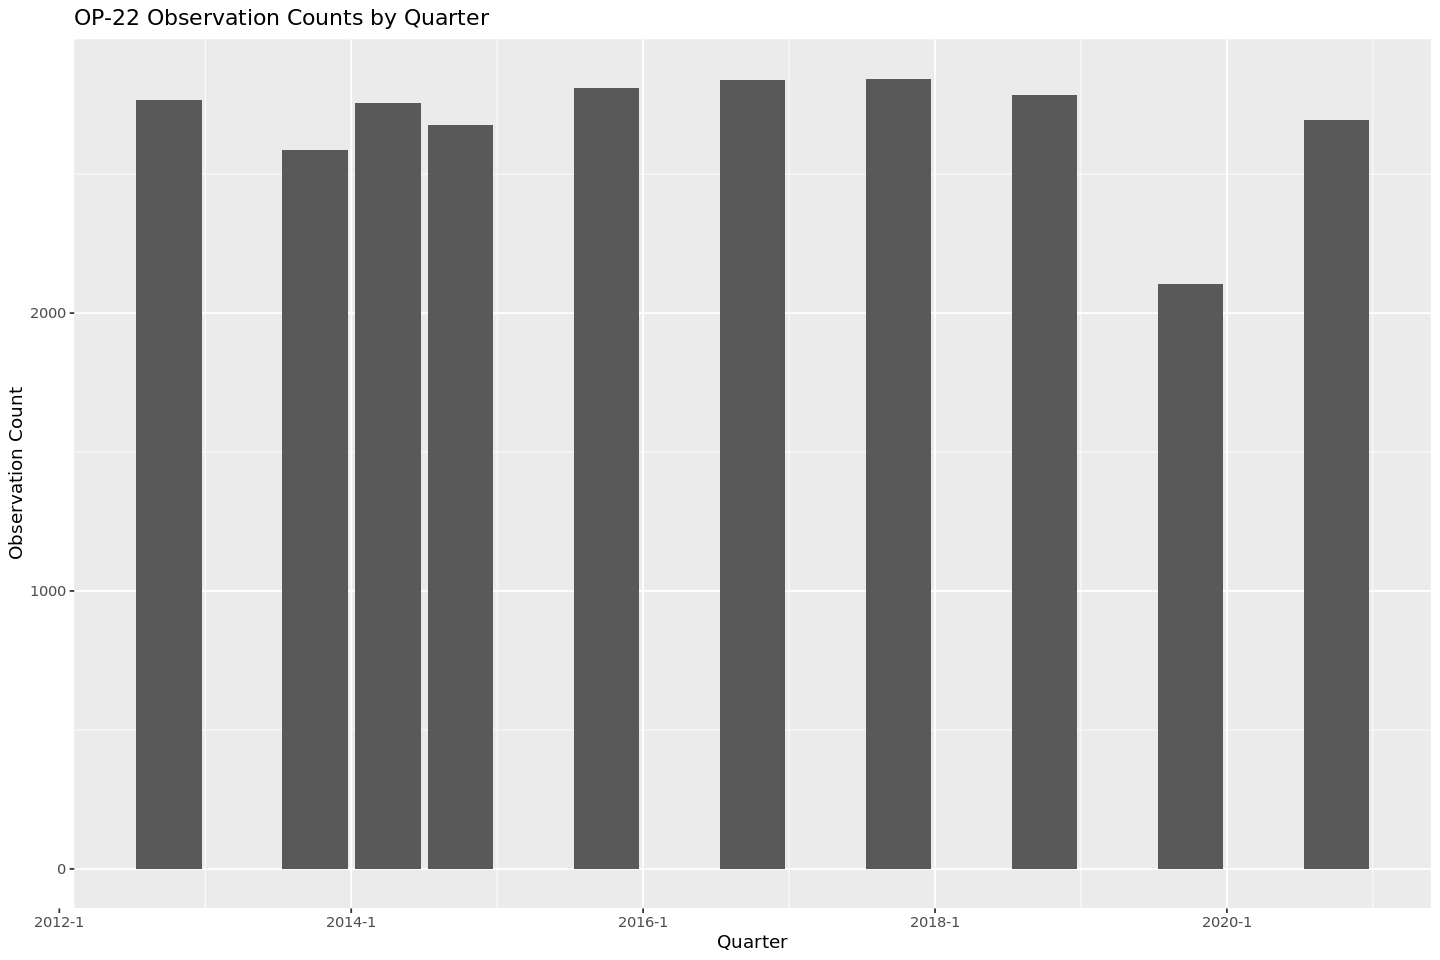

In [10]:
# Change plot size to 12 x 8
options(repr.plot.width=12, repr.plot.height=8)

measure.data %>%
    ggplot(aes(x = y_quarter)) +
    geom_bar() +
    xlab("Quarter") +
    ylab("Observation Count") +
    ggtitle("OP-22 Observation Counts by Quarter")

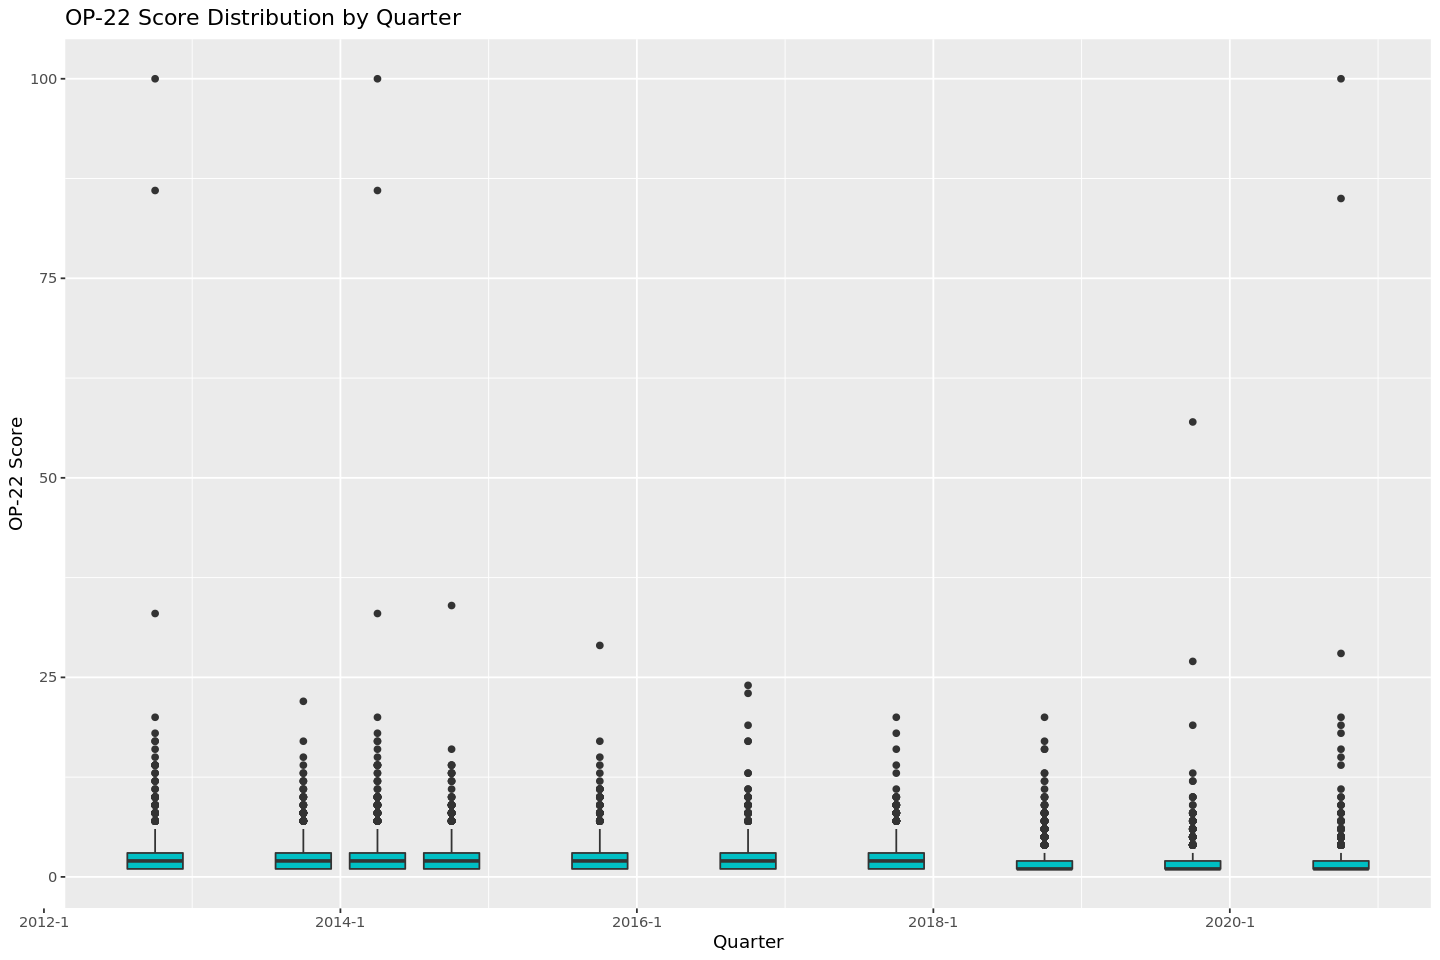

In [11]:
measure.data %>%
    ggplot(aes(x = y_quarter, y = score, group = y_quarter)) +
    ylab("OP-22 Score") +
    xlab("Quarter") +
    geom_boxplot(fill = "#00BFC4")+
    ggtitle("OP-22 Score Distribution by Quarter")

### Provider Analysis

The OP-22 dataset contains 3320 unique providers. Most providers have 14 quarters of data. 3027 providers had 8 or more quarters of data and were thus included in the ACF Time Series Analysis.

In [12]:
measure.data %$% provider_id %>% n_distinct()

[1] 3888

In [13]:
provider.counts <- 
    measure.data %>%
    arrange(provider_id, y_quarter) %>%
    group_by(provider_id) %>%
    count() %>%
    rename(provider.n = n) %>% 
    arrange(-provider.n) 

provider.counts %>% head()

provider_id,provider.n
<chr>,<int>
10007,19
10029,18
30002,18
10023,17
10005,16
10011,16


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se,Q0.1,Q0.25,Q0.75,Q0.9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
provider_id*,1,3888,1944.500000,1122.513252,1944.5,1944.500000,1441.0872,1,3888,3887,0.0000000,-1.2009260,18.00231467,389.7,972.75,2916.25,3499.3
n,2,3888,6.909465,3.172274,8.0,7.212404,2.9652,1,19,18,-0.5503346,-0.9282461,0.05087537,2.0,4.00,10.00,10.0


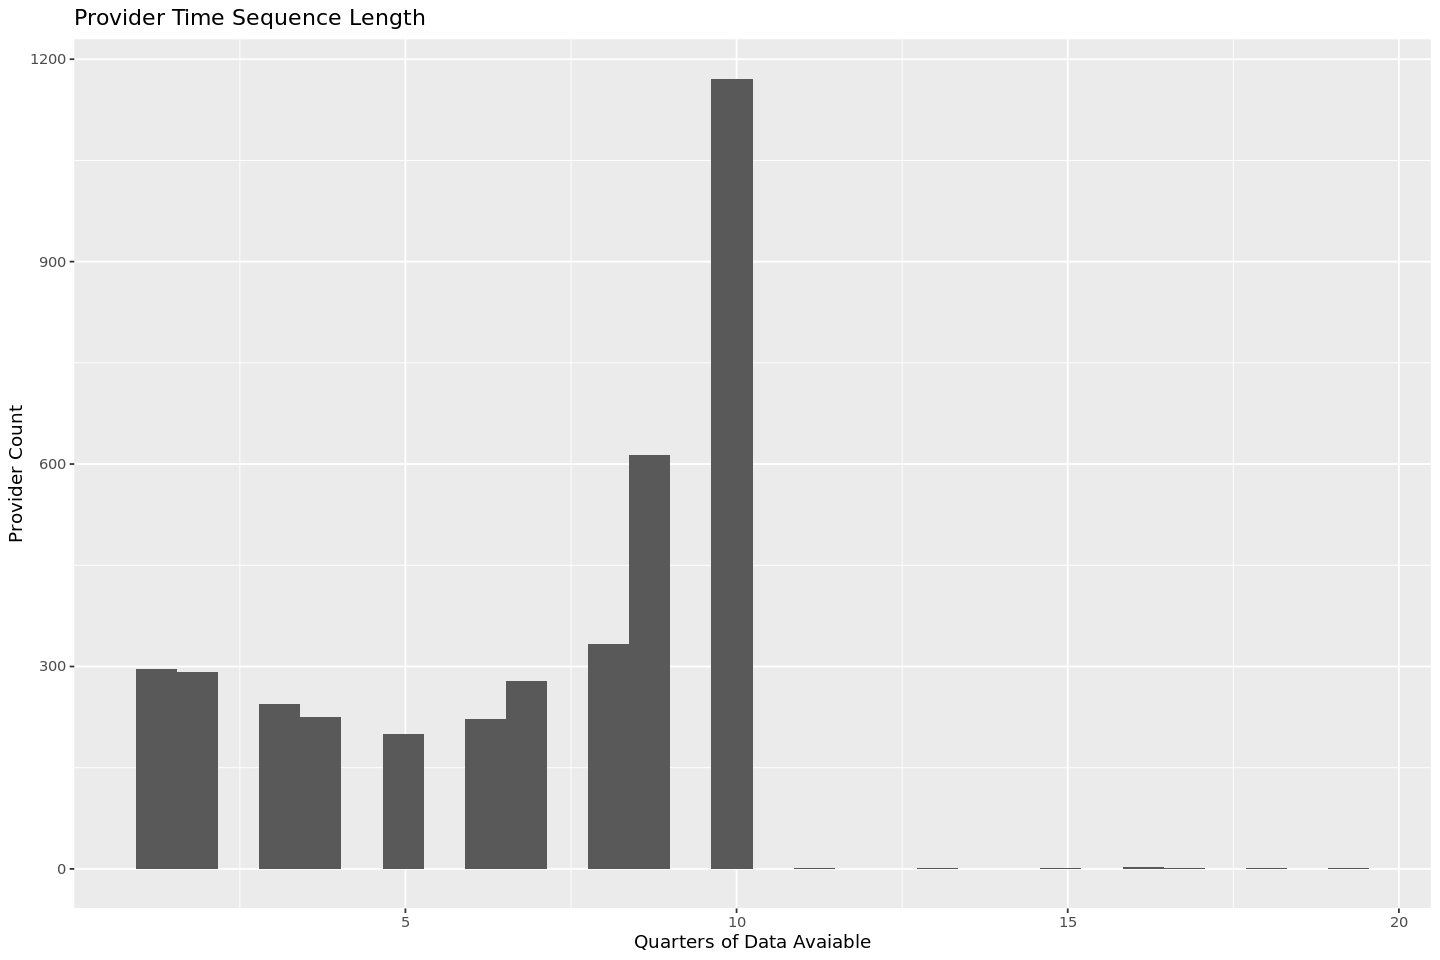

In [18]:
measure.data %>%
    arrange(provider_id,y_quarter) %>%
    count(provider_id) %T>% 
        {describe(., quant = c(.1,.25,.75,.9)) %>% display()} %>%
    ggplot(aes(n)) +
    xlab("Quarters of Data Avaiable") + 
    ylab("Provider Count") + 
    geom_histogram(bins =30) +
    ggtitle("Provider Time Sequence Length")

In [15]:
measure.data.filtered <- measure.data %>%
    arrange(provider_id,y_quarter) %>%
    group_by(provider_id) %>%
    filter(n() >= 8)

In [16]:
measure.data.filtered %$% provider_id %>% n_distinct()

[1] 2129

# Time Series Analysis

### Provider Level ACF Plots
From the handful of plot below, we see some evidence of autocorrelation among lags one and two. A ridge plot willl be applied to test this trend more broadly across all providers.

In [22]:
measure.data.filtered 
    select(provider_id, score) %>%

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: measure.data.filtered 
2:     select(provider_id, score) %>%
  ^


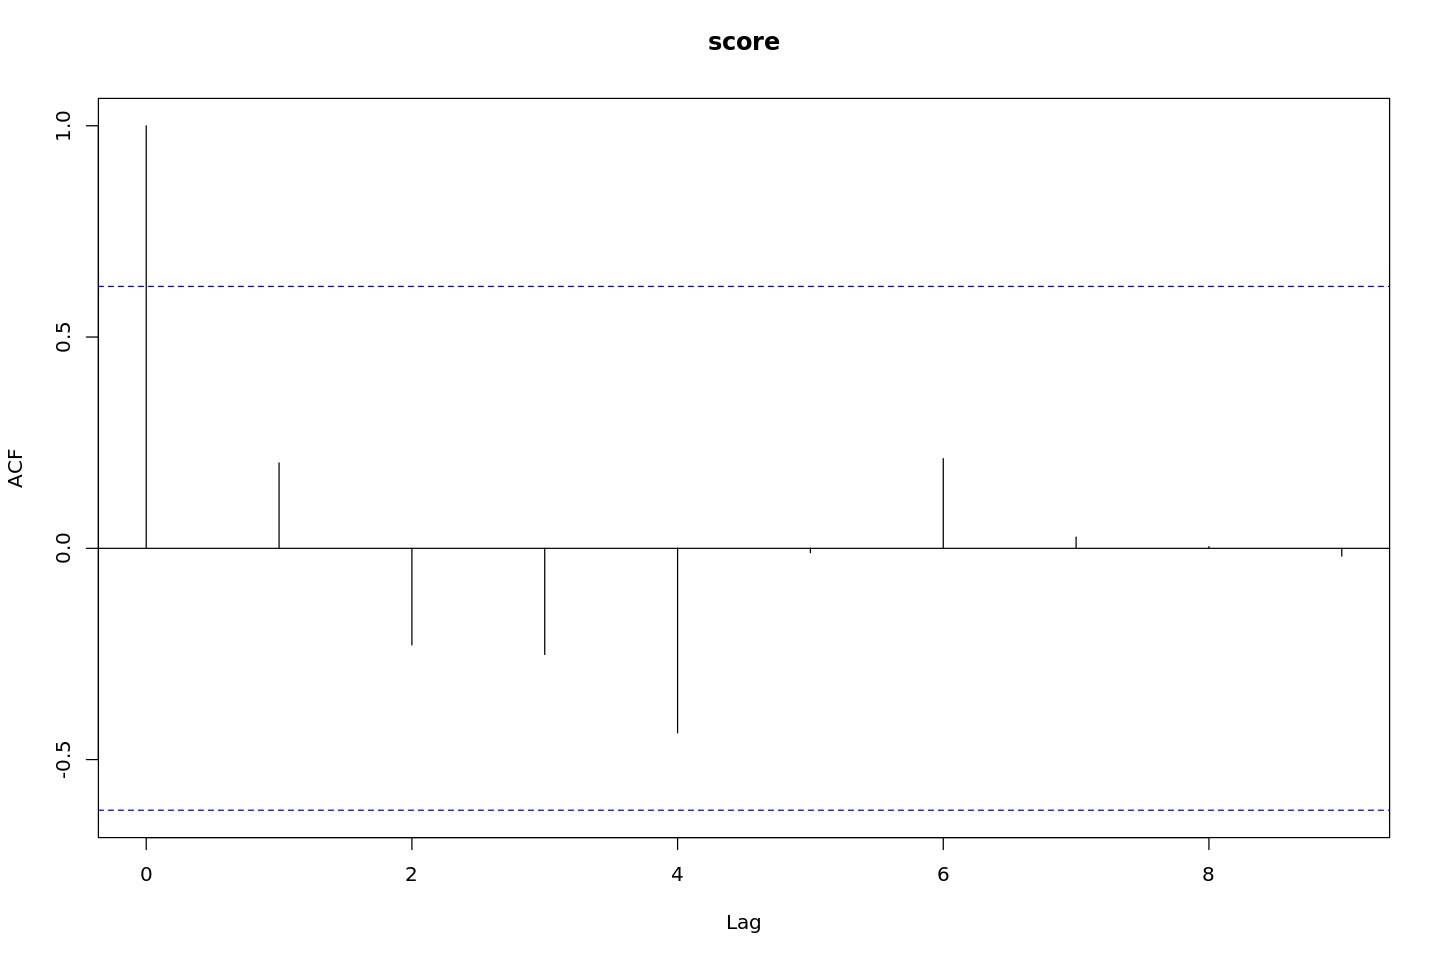

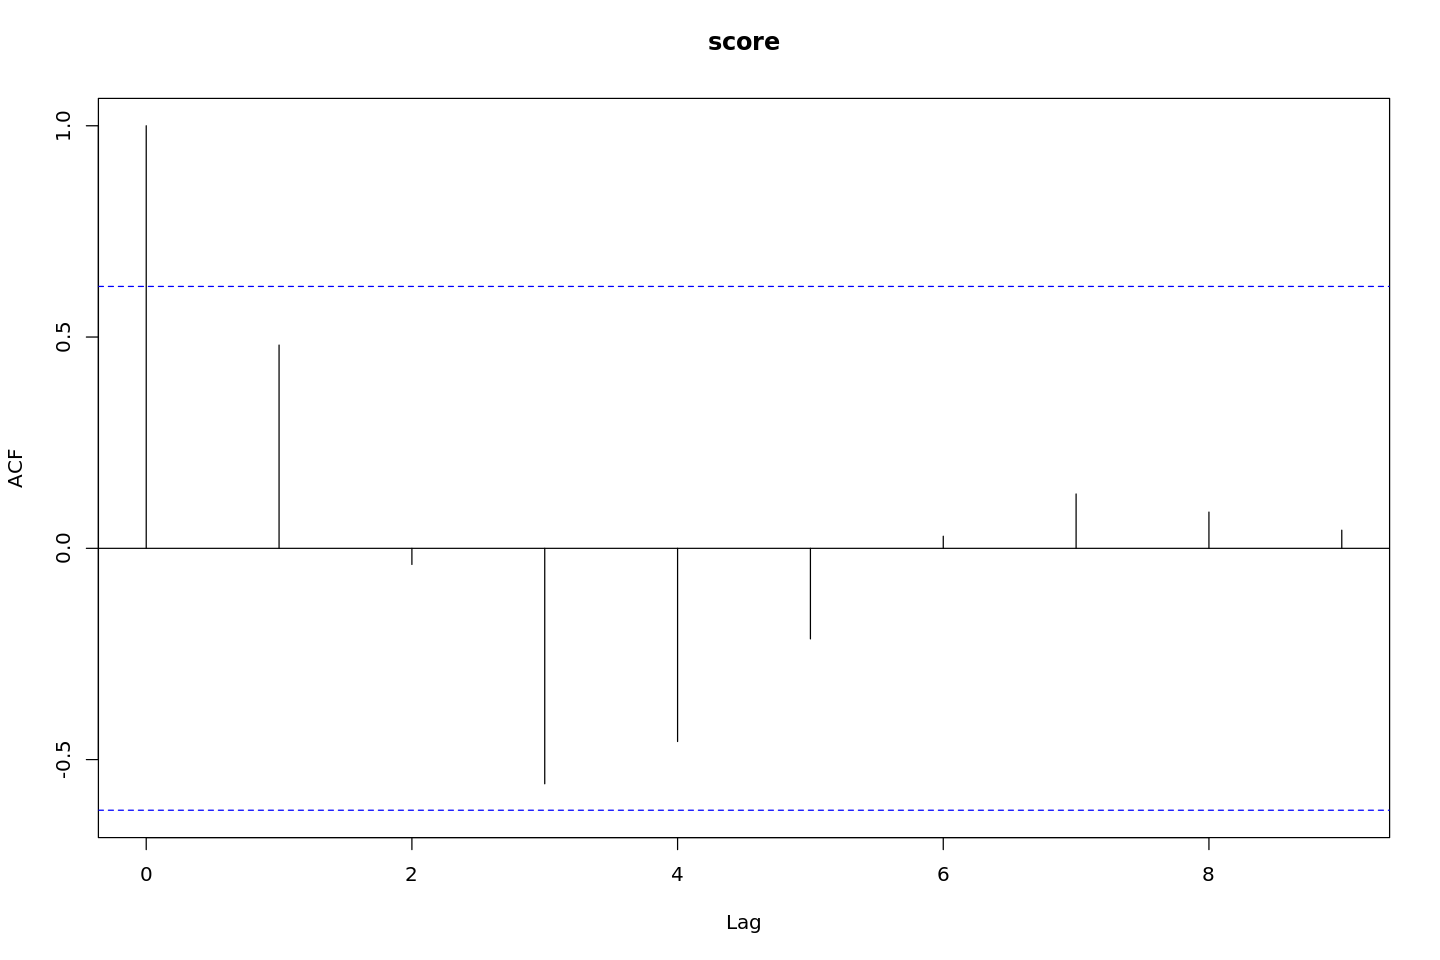

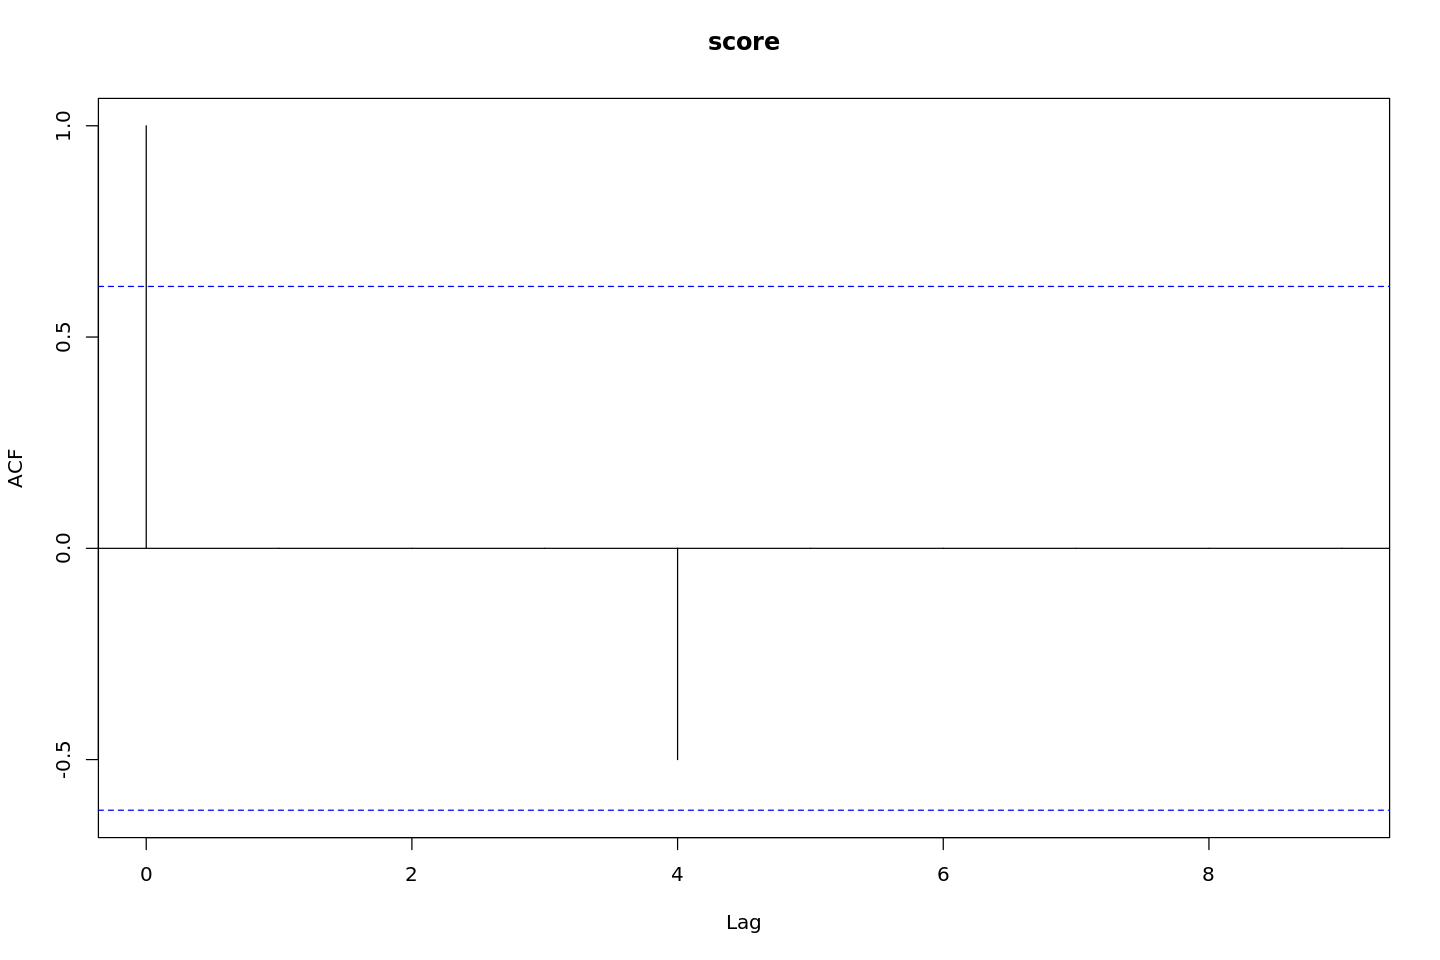

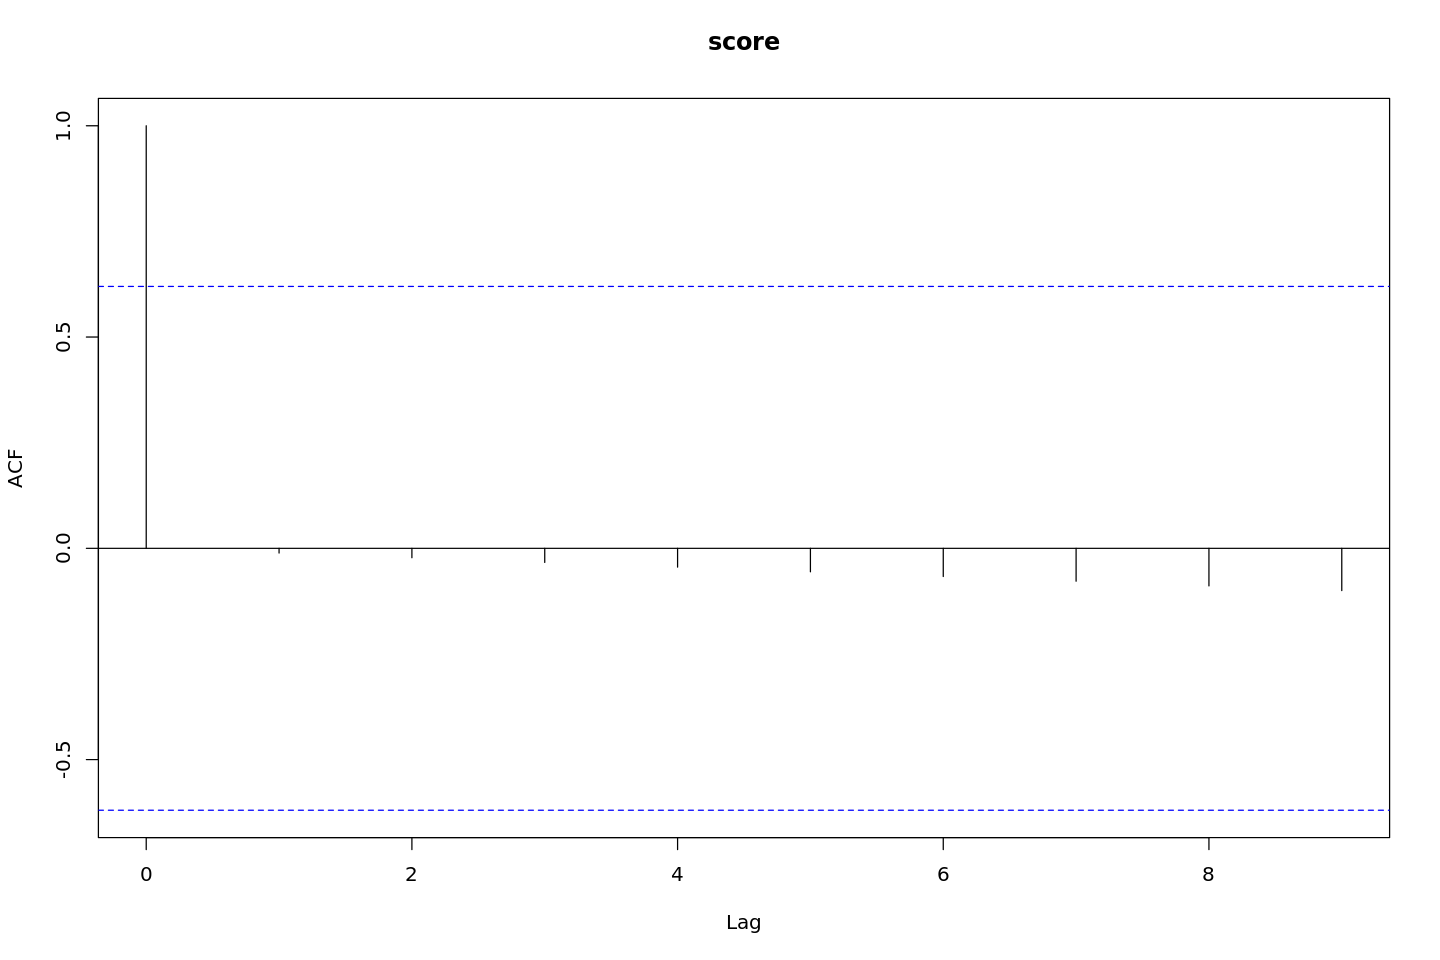

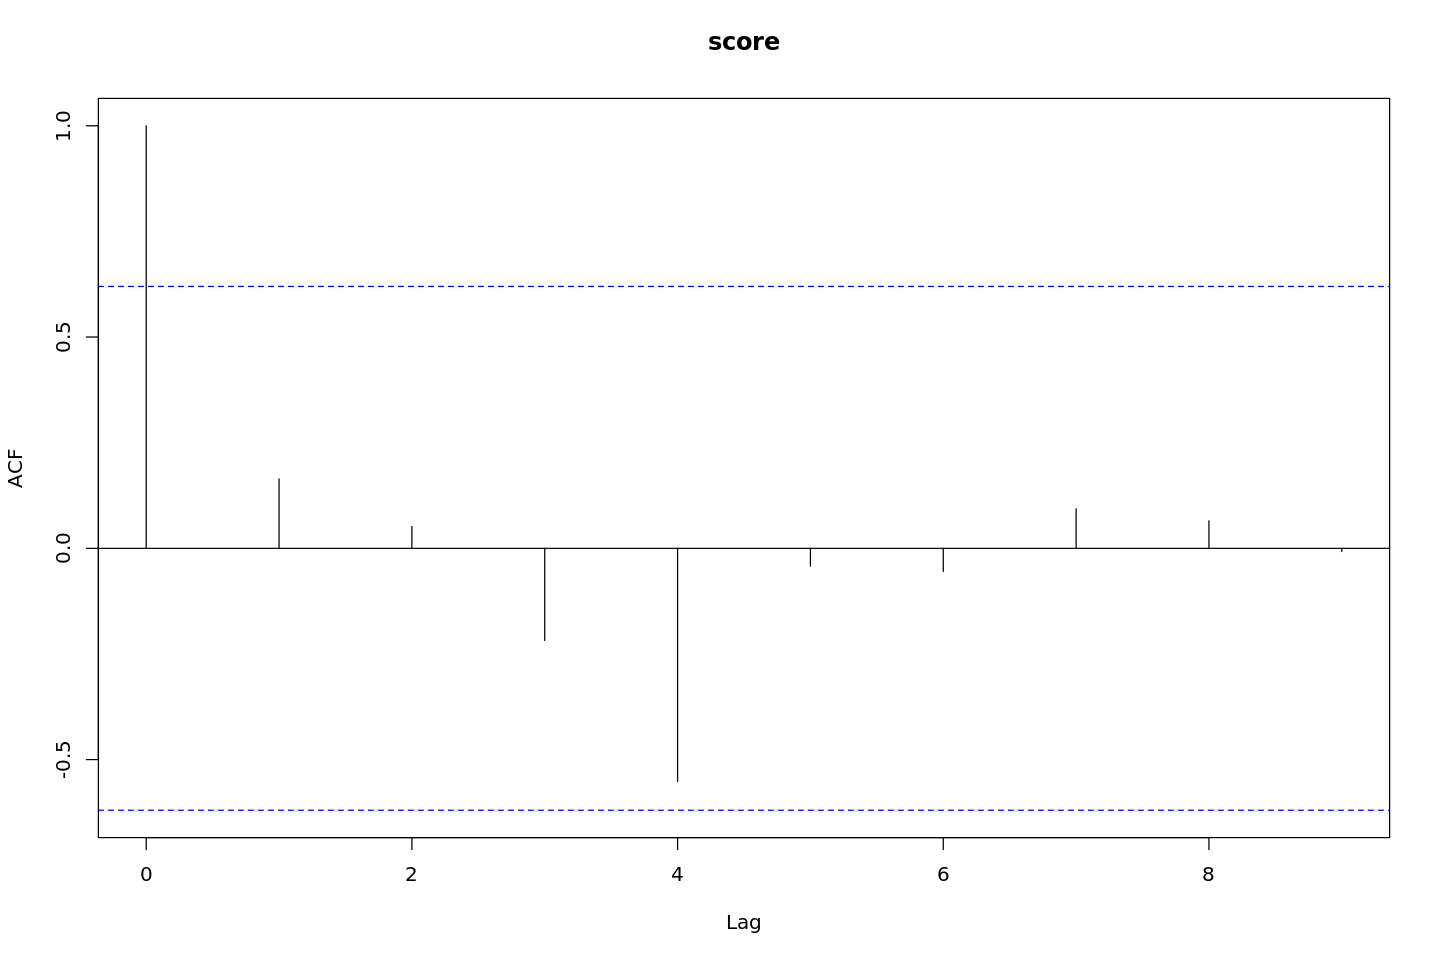

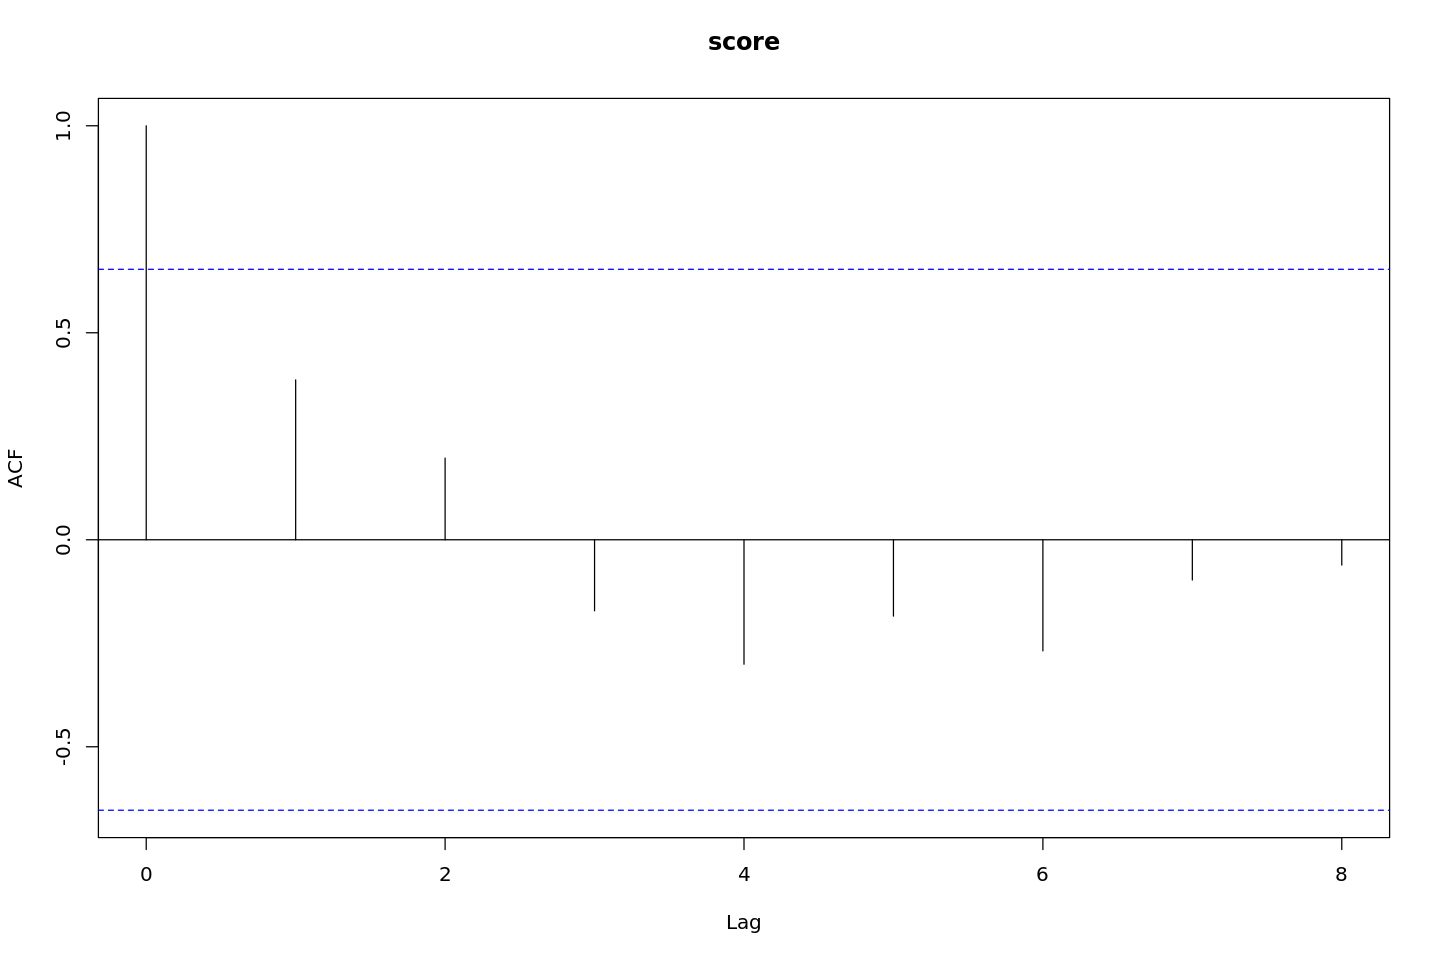

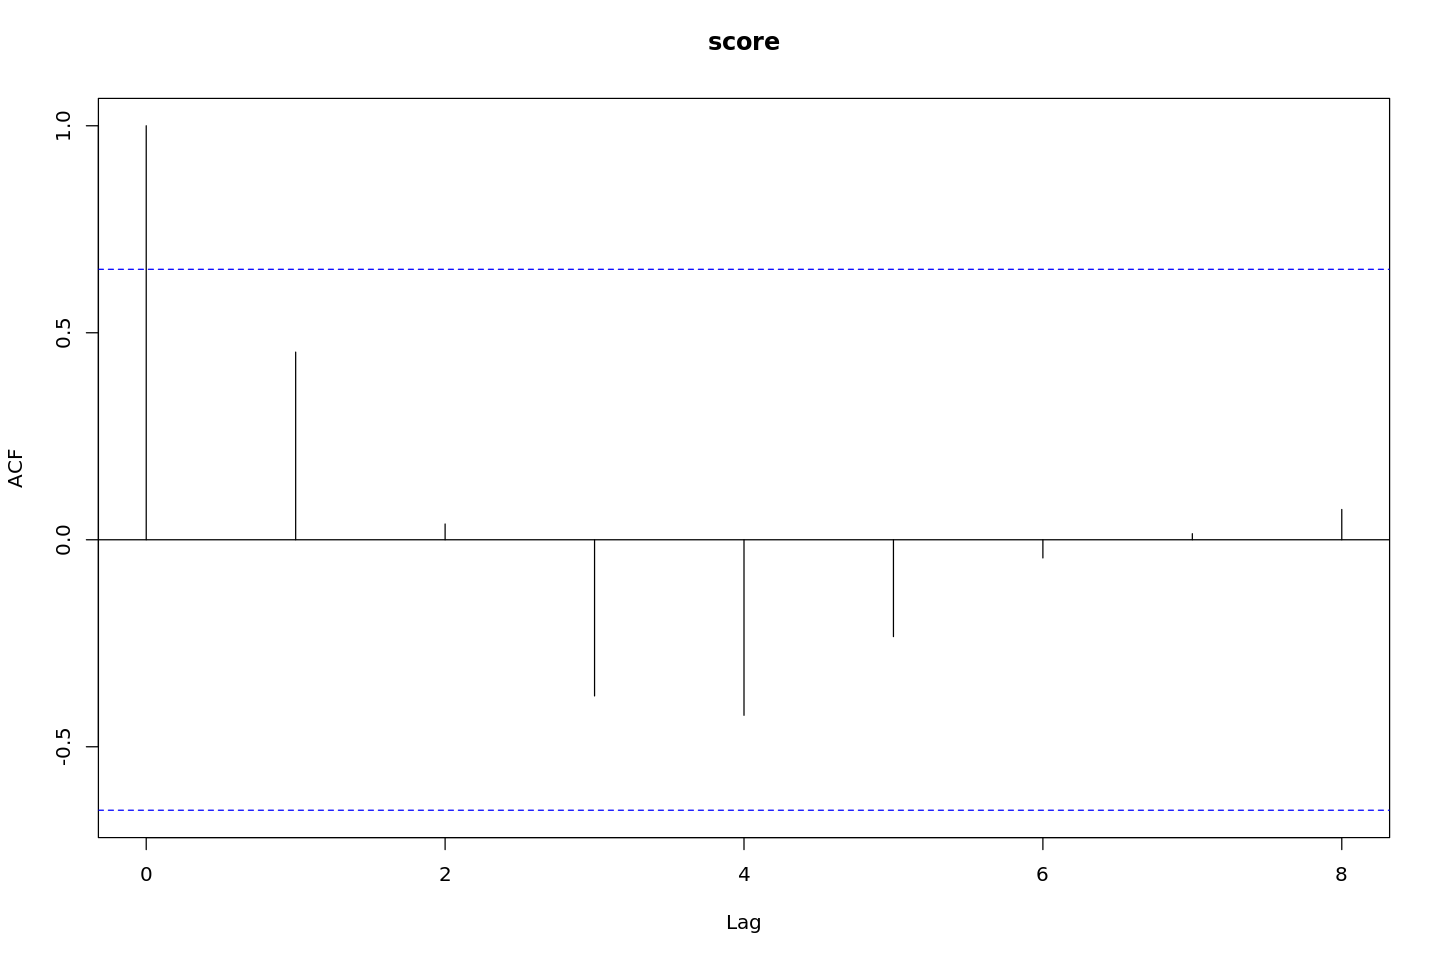

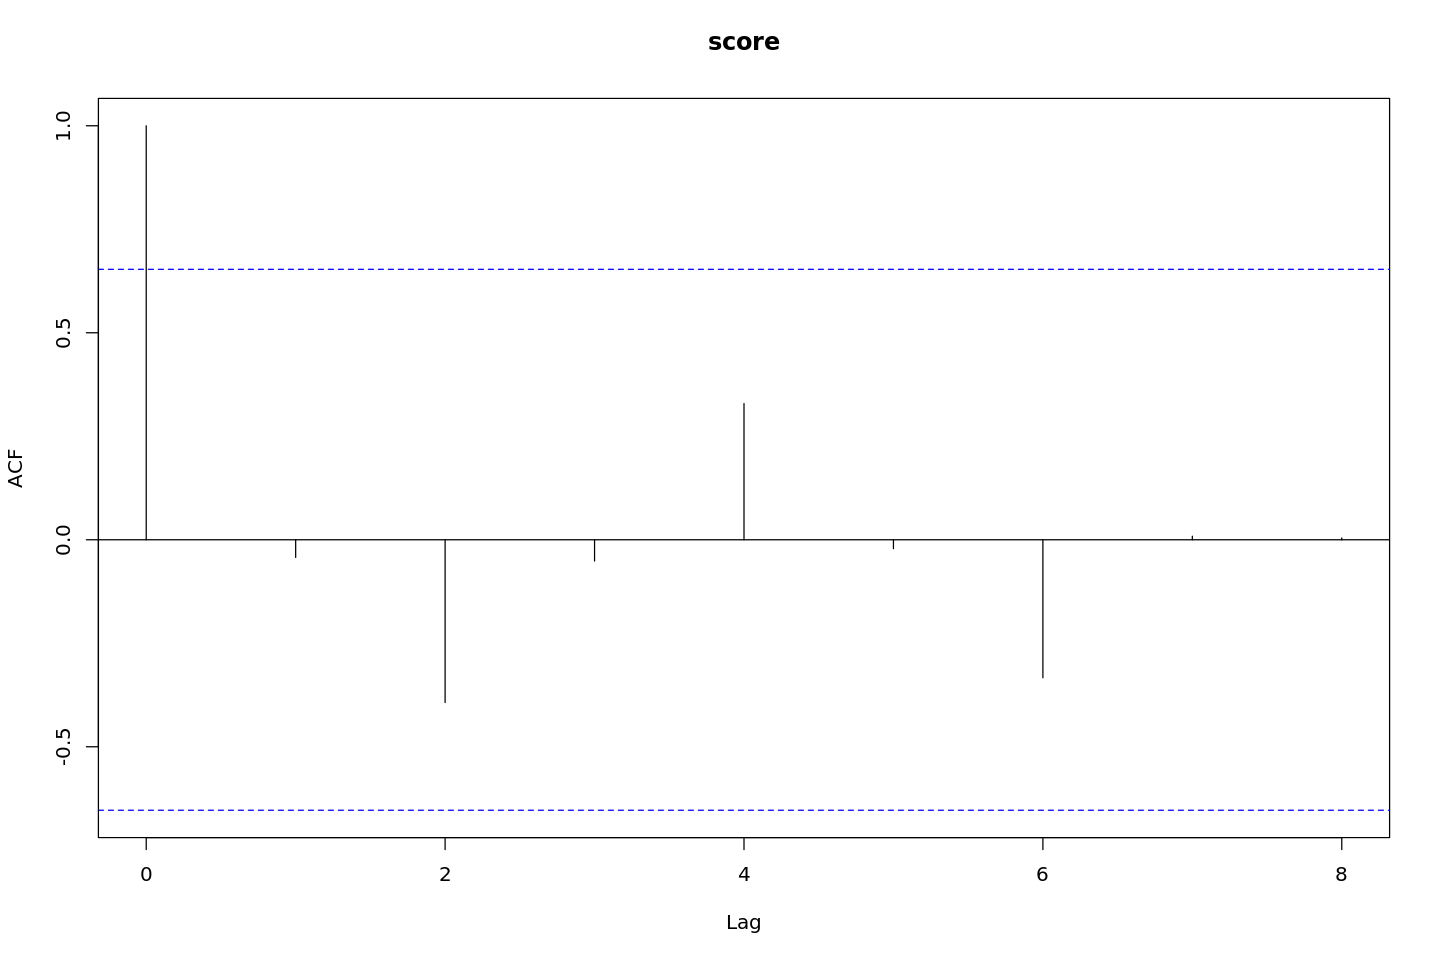

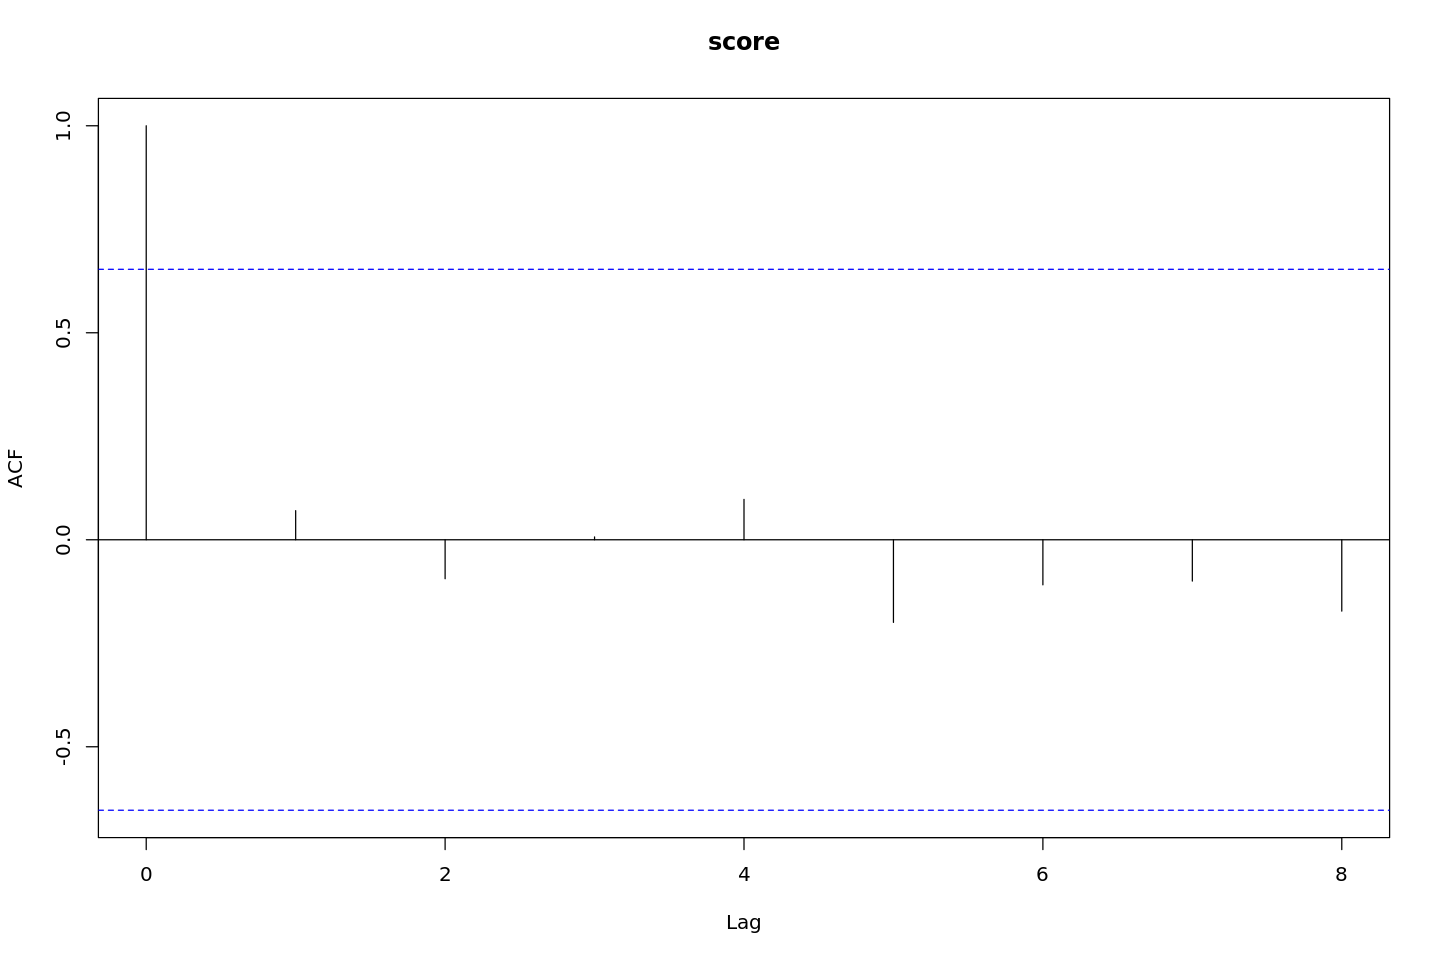

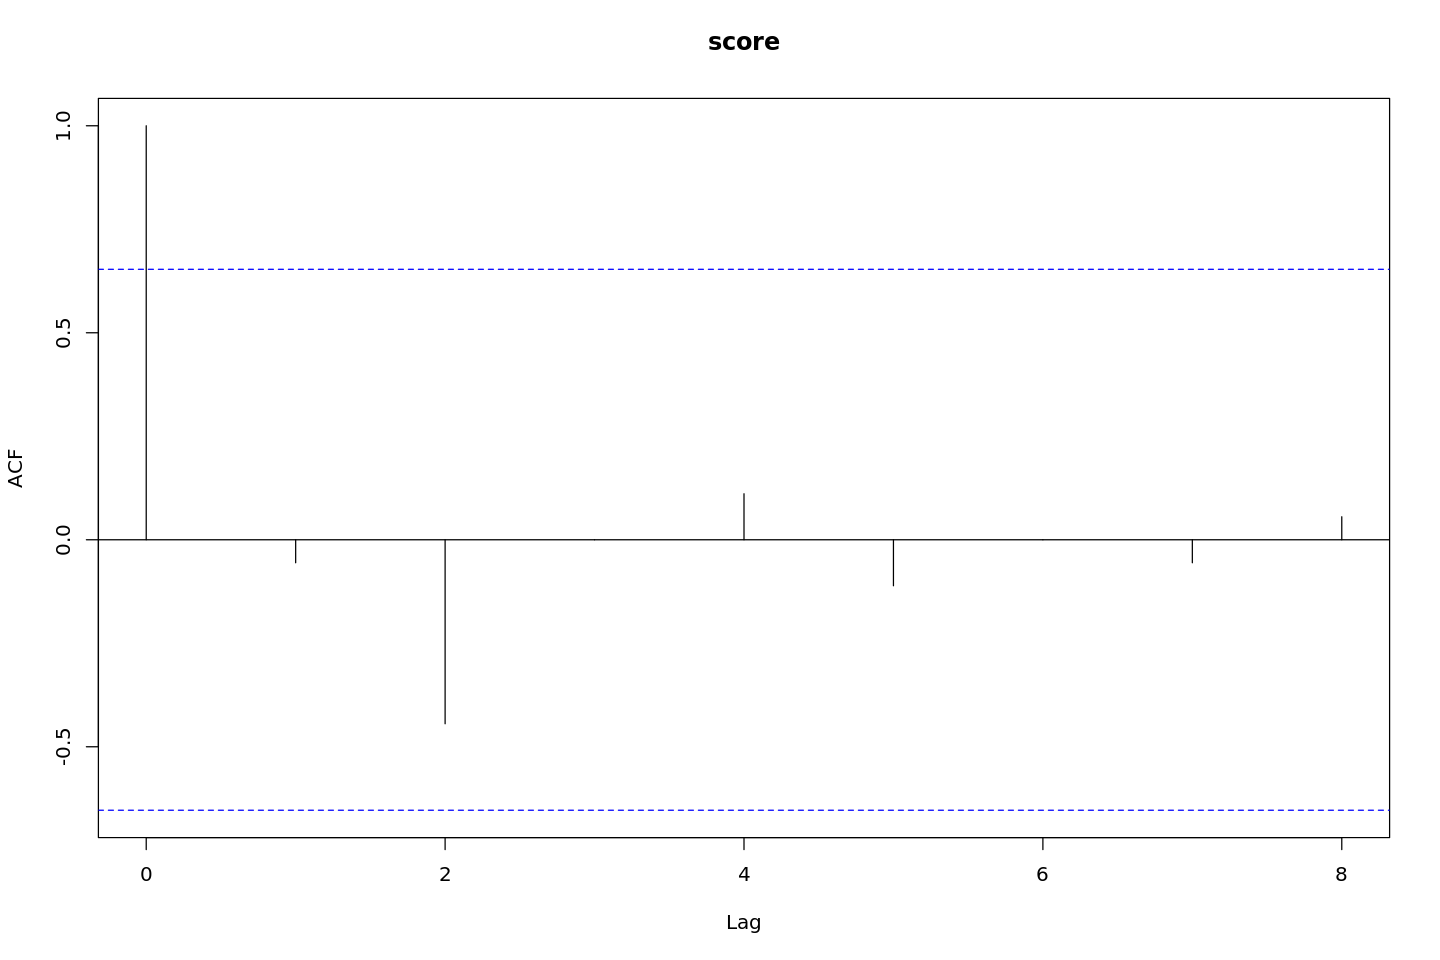

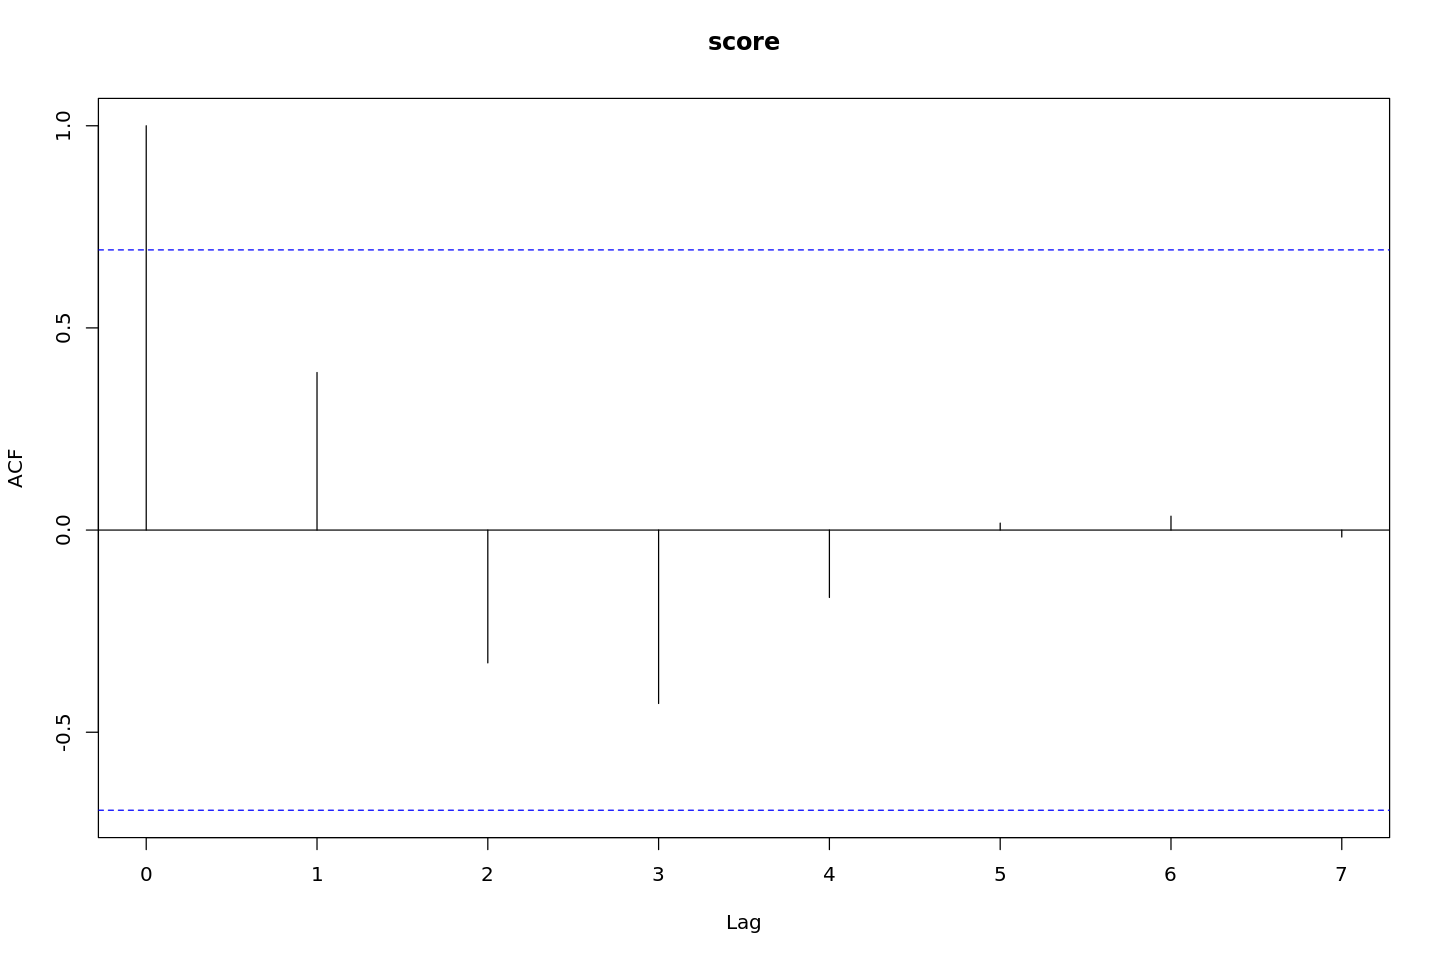

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


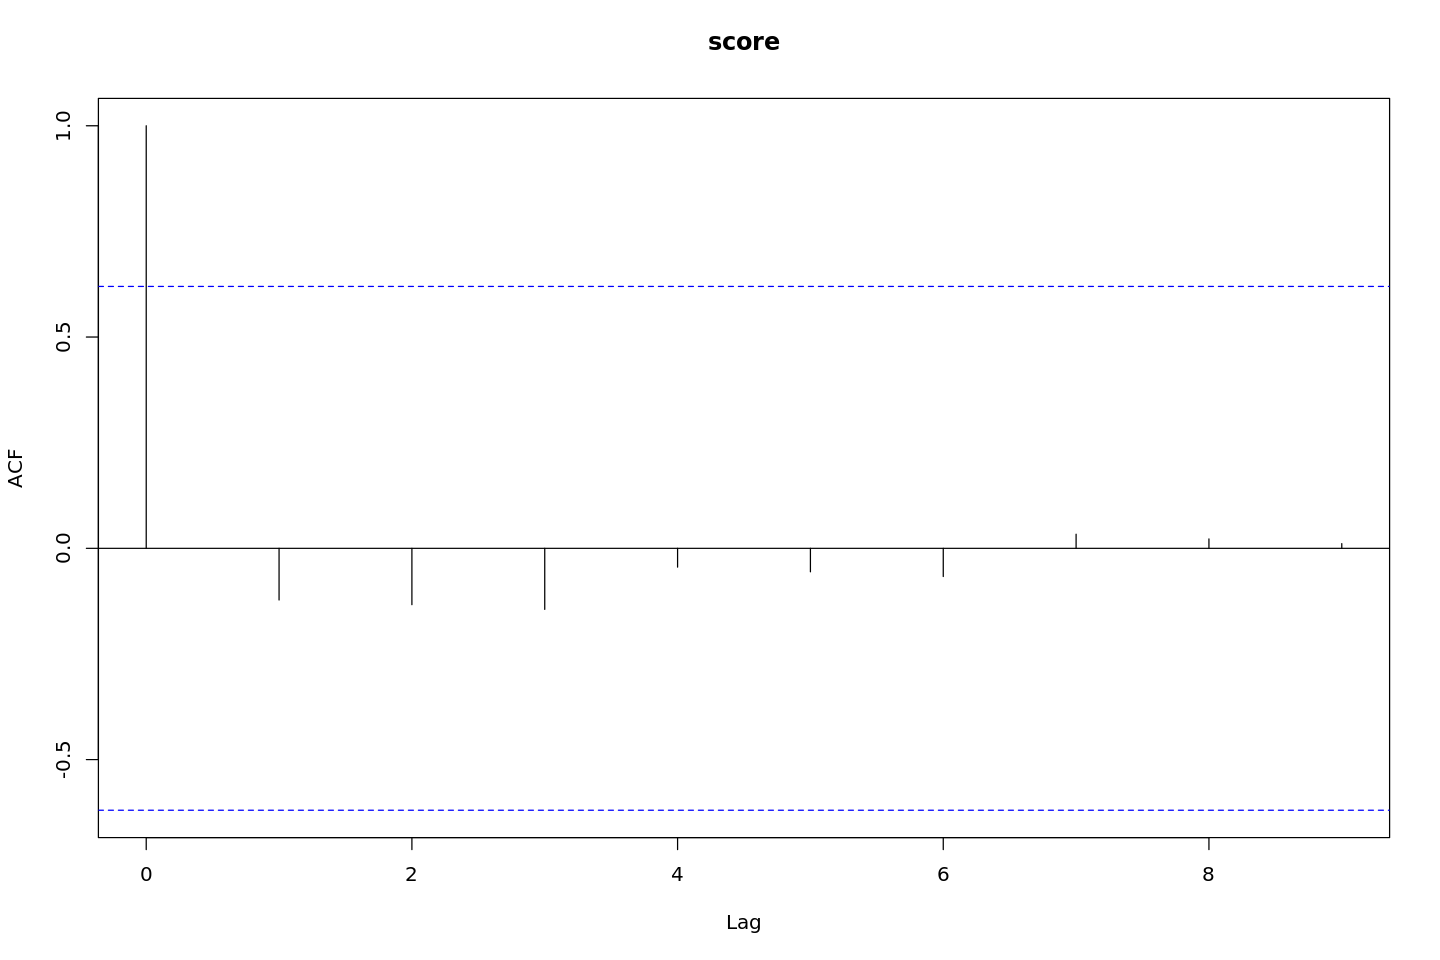

ERROR: Error in plot.window(...): need finite 'ylim' values


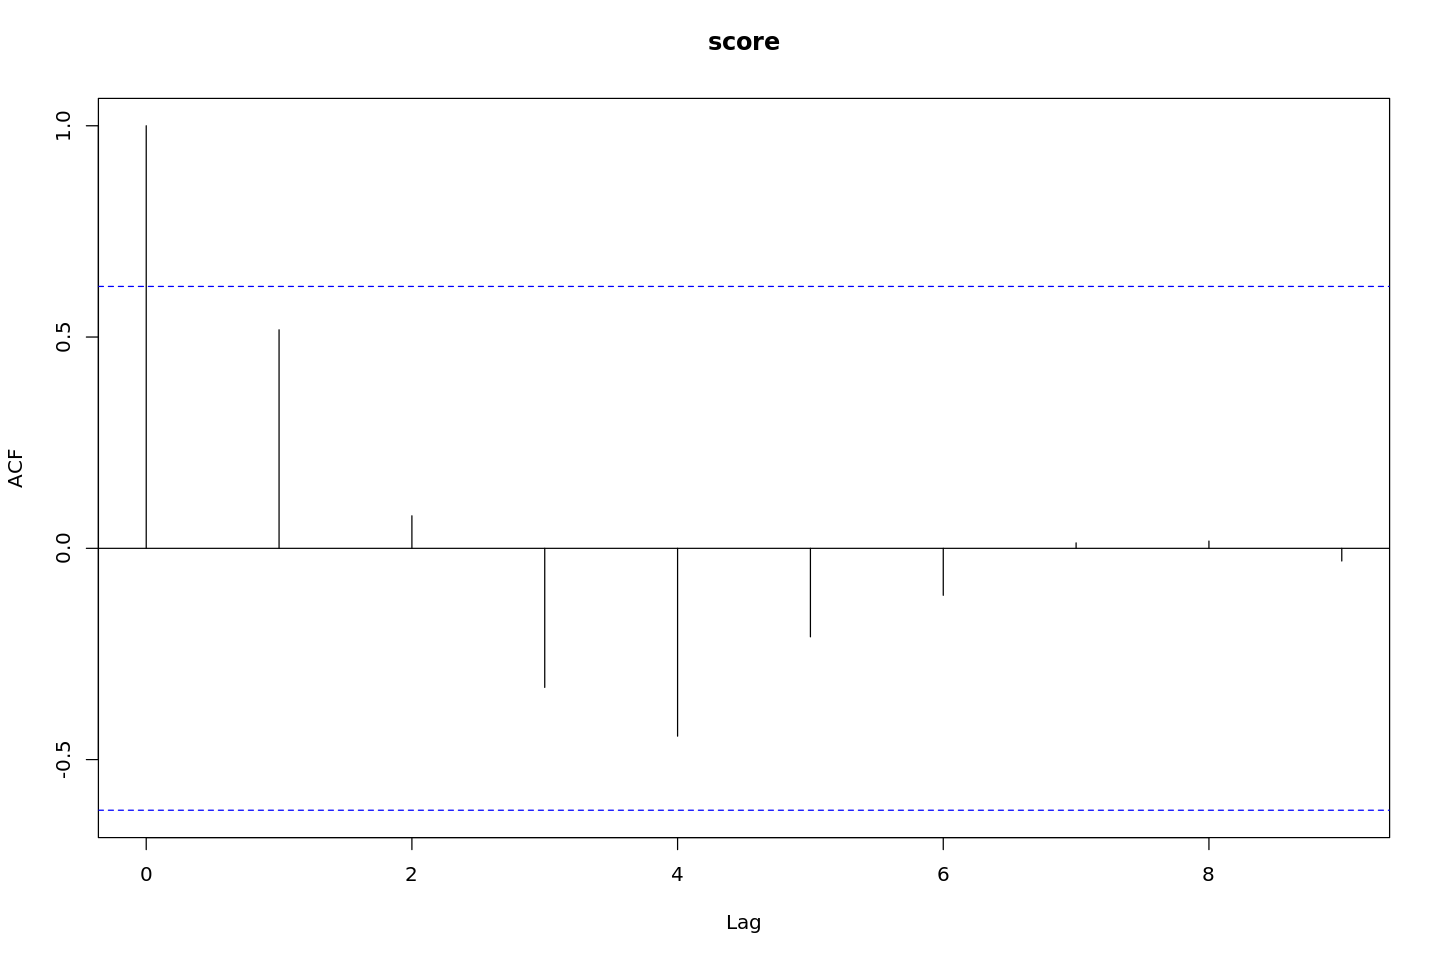

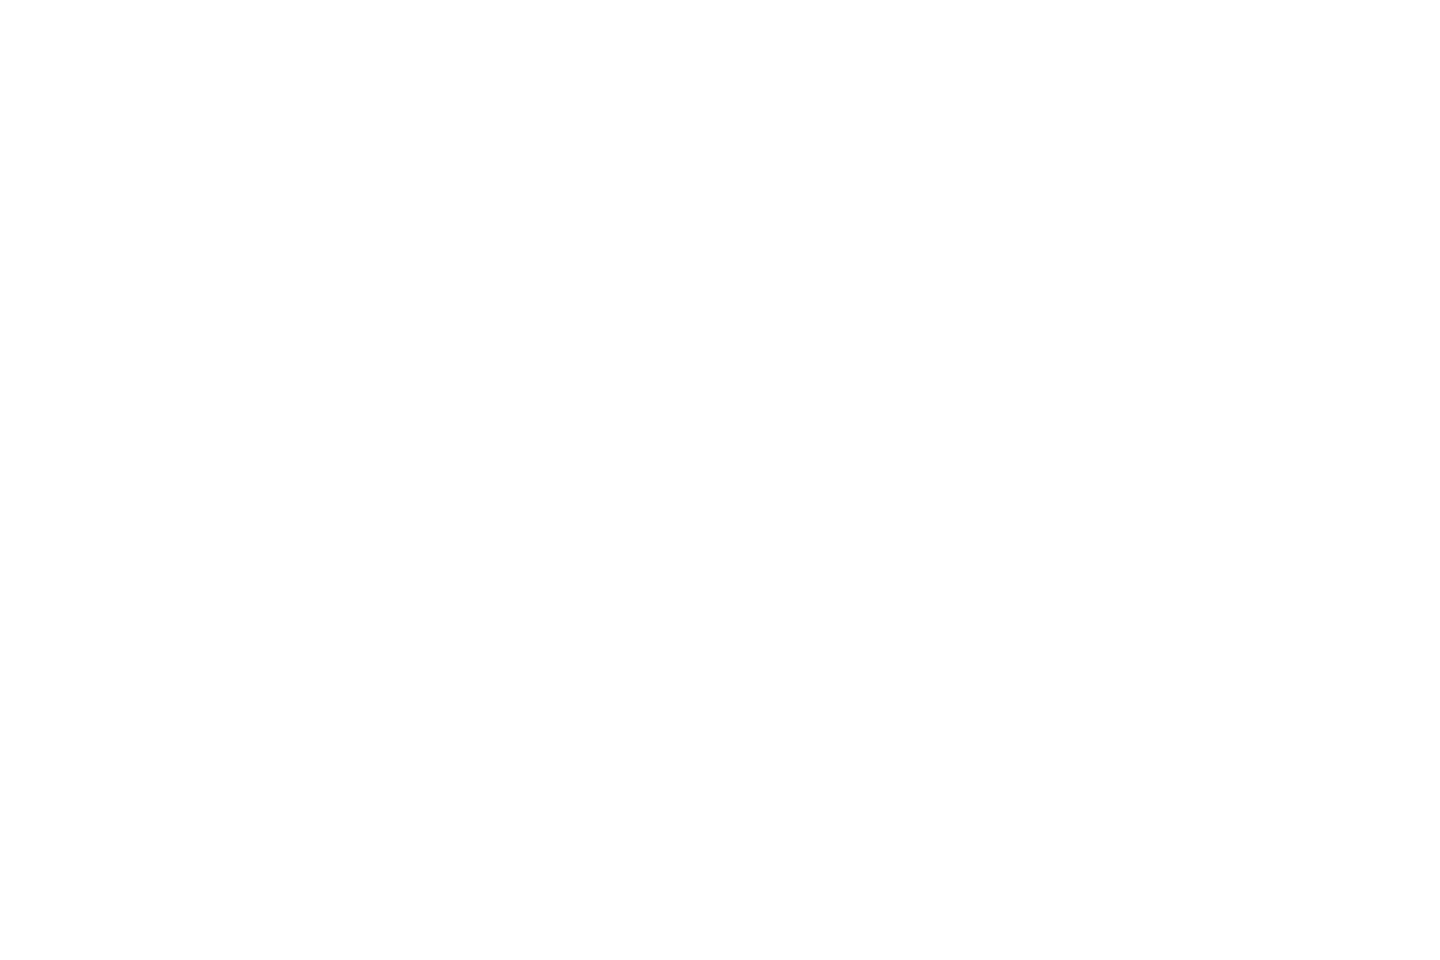

In [44]:
#ACF quick visual
measure.data.filtered %>%
    select(provider_id, score) %>%
    mutate(provider_id = as.integer(provider_id)) %>%
    filter(provider_id < 100021) %>%
    group_by(provider_id) %>%
    group_map(acf, na.action= na.exclude)

### ACF Value Matrix

In [46]:
ac_scores <- 
    measure.data.filtered %>%
    select(provider_id, score) %>%
    mutate(provider_id = as.integer(provider_id)) %>%
    group_by(provider_id)%>%
    group_map(acf, plot = FALSE, na.action= na.exclude)

unlisted <- ac_scores %>% unlist(recursive = FALSE)

acfs <- unlisted[names(unlisted) == "acf"]

acf.matrix <- acfs %>% 
    lapply(head, 8) %>% 
    do.call(rbind, .)

In [47]:
colnames(acf.matrix) <- paste("Lag", 0:7)

In [48]:
acf.matrix %>% head()

,Lag 0,Lag 1,Lag 2,Lag 3,Lag 4,Lag 5,Lag 6,Lag 7
acf,1,0.20204082,-0.22857143,-0.25102041,-0.43673469,-0.01020408,0.21224490,0.02653061
acf,1,0.48095238,-0.03809524,-0.55714286,-0.45714286,-0.21428571,0.02857143,0.12857143
acf,1,0.00000000,0.00000000,0.00000000,-0.50000000,0.00000000,0.00000000,0.00000000
acf,1,-0.01111111,-0.02222222,-0.03333333,-0.04444444,-0.05555556,-0.06666667,-0.07777778
acf,1,0.16425703,0.05140562,-0.21807229,-0.55180723,-0.04216867,-0.05461847,0.09357430
acf,1,0.38611111,0.19722222,-0.17166667,-0.30055556,-0.18444444,-0.26833333,-0.09722222


### Ridgeline Plot 

Looking at all providers confirms this trend on a broader scale- there is a significant correlation between many providers' current score and their past two previous scores (lag 1 and lag 2). Lag 1 and Lag 2 should therefore be included in the model features. 

Picking joint bandwidth of 0.0357



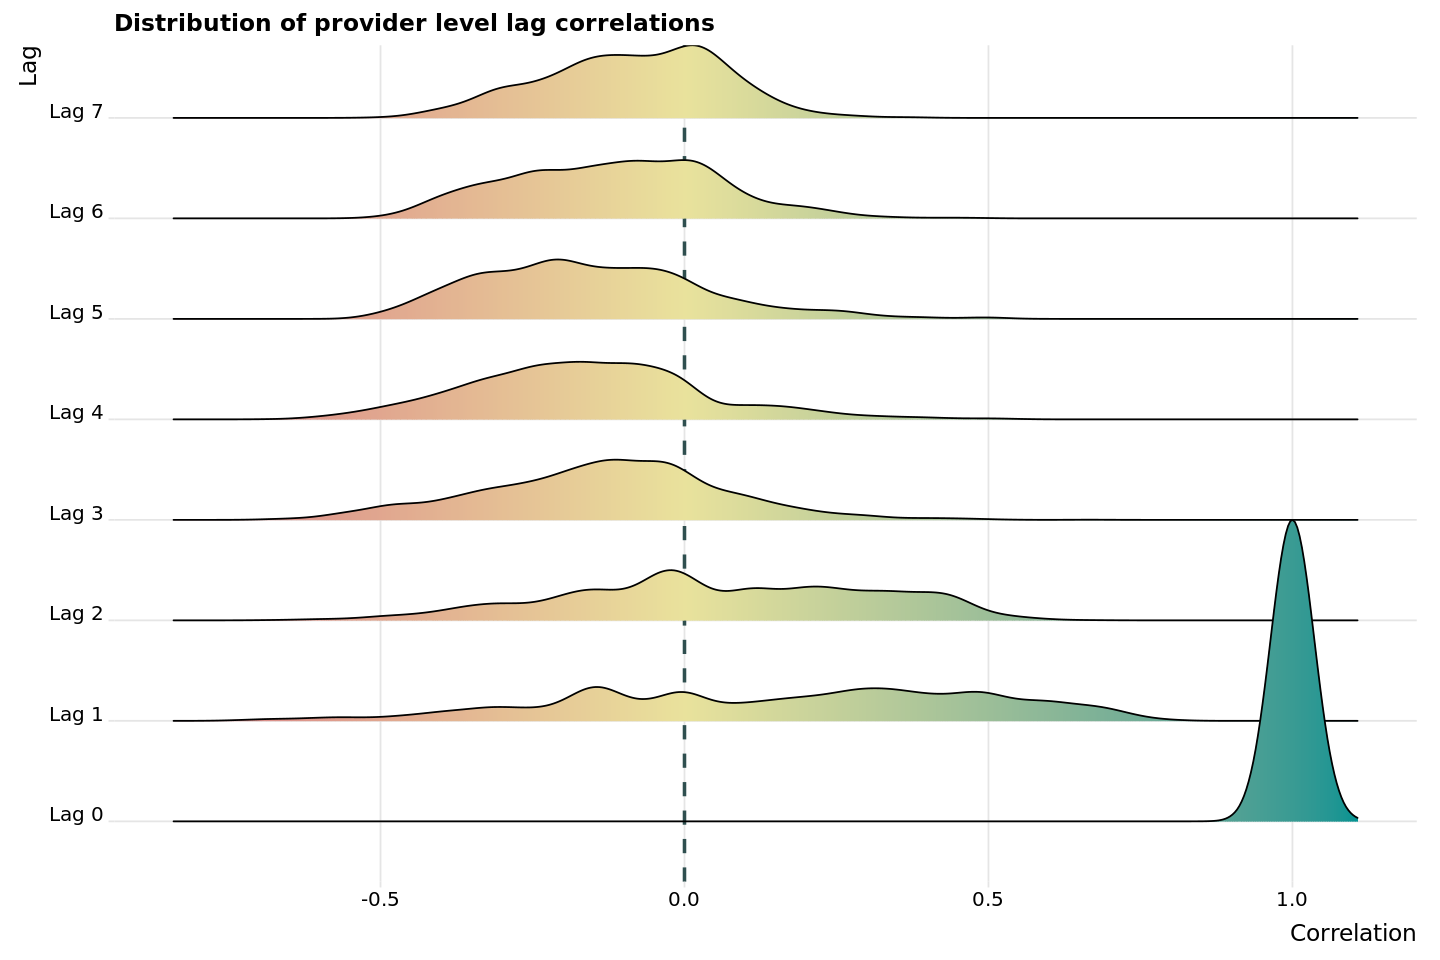

In [49]:
options(repr.plot.width=12, repr.plot.height=8)
acf.matrix %>% 
    as.data.frame() %>% 
    gather(Lag, Correlation) %>%
    mutate(Lag = as.factor(Lag)) %>%
    mutate(Lag = fct_relevel(Lag, paste("Lag",0:7))) %>%
    ggplot(aes(x = Correlation, y = Lag, fill = ..x..)) + 
        geom_vline(
            xintercept=0, 
            color = "darkslategrey", 
            linetype = 'dashed', 
            size = 1) +
        geom_density_ridges_gradient(scale = 3, alpha = 0.2) +
        scale_fill_gradient2(
            low = "#cf597e",
            mid = "#e9e29c",
            high = "#009392",
            space = "Lab",
            na.value = "grey50",
            guide = "colourbar",
            aesthetics = "fill") + 
        theme_ridges() + 
        ggtitle("Distribution of provider level lag correlations") +
        theme(legend.position = "none")
